To conduct data preprocessing tasks in Python, it is essential to import specific pre-existing Python libraries.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

Downloaded Avocado dataset from Kaggle and Uploaded it in Google Collab

In [ ]:
df=pd.read_csv('/content/avocado.csv')

Dataset loaded successfully

In [ ]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Dataset exploration involves comprehensively examining data properties such as size, variable types, and distribution. Utilizing summary statistics and visualizations, this process provides initial insights, revealing patterns and potential challenges. This foundational step guides subsequent data analysis or preprocessing, ensuring a thorough understanding of the dataset's characteristics and nuances.

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None

Summary Statistics:
         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.00000

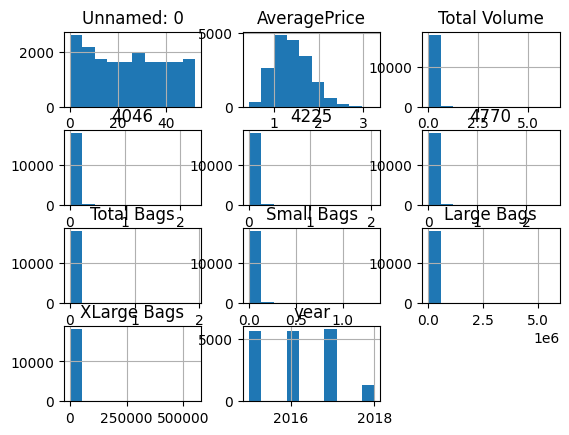

In [ ]:
# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualize the distribution of numerical columns (requires matplotlib or seaborn)
df.hist()
plt.show()

**Distinguish categorical and numerical features:**

In data preprocessing, distinguishing between categorical and numerical features is vital. Categorical features represent discrete groups, while numerical features involve quantifiable values. This differentiation informs specific processing techniques, such as encoding for categories and scaling for numerical values, optimizing subsequent analyses and machine learning model performance.

In [ ]:
# Split the dataset into numerical and categorical data
numerical_cols = df.select_dtypes(include=['int', 'float'])
categorical_cols= df.select_dtypes(include=['object'])
print("Numerical Data:")
print(numerical_cols.head())
print("\nCategorical Data:")
print(categorical_cols.head())

Numerical Data:
   Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0           0          1.33      64236.62  1036.74   54454.85   48.16   
1           1          1.35      54876.98   674.28   44638.81   58.33   
2           2          0.93     118220.22   794.70  109149.67  130.50   
3           3          1.08      78992.15  1132.00   71976.41   72.58   
4           4          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  year  
0     8696.87     8603.62       93.25          0.0  2015  
1     9505.56     9408.07       97.49          0.0  2015  
2     8145.35     8042.21      103.14          0.0  2015  
3     5811.16     5677.40      133.76          0.0  2015  
4     6183.95     5986.26      197.69          0.0  2015  

Categorical Data:
         Date          type  region
0  2015-12-27  conventional  Albany
1  2015-12-20  conventional  Albany
2  2015-12-13  conventional  Albany
3  2015-12-06  conventional 

**Detect Missing Values:**

This code systematically computes the percentage of missing values within numerical and categorical columns independently. It further aggregates these individual percentages to determine the overall rate of missing values encompassing both numerical and categorical features. This comprehensive analysis aids in identifying the extent of missing data within the dataset, facilitating informed decisions on data imputation or handling strategies during the data preprocessing phase.

In [ ]:
# Identify missing values
df.replace('na', np.nan, inplace=True)
df.replace('0', np.nan, inplace=True)
missing_values = df.isnull().sum()
total_values = df.shape[0]
missing_percentage = (missing_values / total_values) * 100
print("\n\nPercentage of missing values in each column:")
print(missing_percentage)



Percentage of missing values in each column:
Unnamed: 0      0.0
Date            0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
year            0.0
region          0.0
dtype: float64


All columns are devoid of any missing values, eliminating the necessity for handling or imputing missing data.

**Feature extraction:**

Datetime Features:
Extract features from the 'Date' column, such as month and day.

In [ ]:
# Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.drop(columns=['Date'], inplace=True)

# Display the modified DataFrame
print(df.head())

   Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0           0          1.33      64236.62  1036.74   54454.85   48.16   
1           1          1.35      54876.98   674.28   44638.81   58.33   
2           2          0.93     118220.22   794.70  109149.67  130.50   
3           3          1.08      78992.15  1132.00   71976.41   72.58   
4           4          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Day  Month  Year  
0  Albany   27     12  2015  
1  Albany   20     12  2015  
2  Albany   13     12  201

Bag Size Ratios:
Derive ratios of different bag sizes based on the 'Small Bags,' 'Large Bags,' and 'XLarge Bags' columns.

In [ ]:
df['Small Bags Ratio'] = df['Small Bags'] / df['Total Bags']
df['Large Bags Ratio'] = df['Large Bags'] / df['Total Bags']
df['XLarge Bags Ratio'] = df['XLarge Bags'] / df['Total Bags']


AveragePrice per Unit Volume:
Calculate the 'AveragePrice' per unit volume for each avocado type.

In [ ]:
df['AveragePrice per Unit Volume'] = df['AveragePrice'] / df['Total Volume']


In [ ]:
# Drop the 'year' column to make the dataset more relevant
numerical_data_no_year = numerical_cols.drop(columns=['year'])


**Encoding:**

It is typically applied to convert categorical variables into a format suitable for machine learning models. One common encoding technique is one-hot encoding, which creates binary columns for each category. For the 'type' and 'region' columns it is performed

In [ ]:
df_encoded = pd.get_dummies(df, columns=['type', 'region'], drop_first=True)
print(df_encoded.head())

   Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0           0          1.33      64236.62  1036.74   54454.85   48.16   
1           1          1.35      54876.98   674.28   44638.81   58.33   
2           2          0.93     118220.22   794.70  109149.67  130.50   
3           3          1.08      78992.15  1132.00   71976.41   72.58   
4           4          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  ...  region_SouthCarolina  \
0     8696.87     8603.62       93.25          0.0  ...                     0   
1     9505.56     9408.07       97.49          0.0  ...                     0   
2     8145.35     8042.21      103.14          0.0  ...                     0   
3     5811.16     5677.40      133.76          0.0  ...                     0   
4     6183.95     5986.26      197.69          0.0  ...                     0   

   region_SouthCentral  region_Southeast  region_Spokane  region_StLouis  

**Outliers:**

They are data points significantly deviating from the overall pattern of a dataset. They can impact statistical analyses and machine learning models, often requiring careful identification and handling during data preprocessing.

1)Detection using Z-Score:

Z-score measures how many standard deviations a data point is from the mean. Points with a high absolute z-score (typically greater than 3) are considered outliers.

2)Detection using IQR:

The Interquartile Range (IQR) is the range between the first quartile (Q1) and the third quartile (Q3). Points outside the range Q1-1.5 * IQR TO Q3+1.5 * IQR

In [ ]:
df_copy = df_encoded.copy()

# Choose numerical columns for outlier detection
numerical_columns = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags']

z_scores = np.abs(zscore(df_copy[numerical_columns]))
outliers_z = df_copy[(z_scores > 3).any(axis=1)]
print(outliers_z)


Q1 = df_copy[numerical_columns].quantile(0.25)
Q3 = df_copy[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df_copy[((df_copy[numerical_columns] < Q1 - 1.5 * IQR) | (df_copy[numerical_columns] > Q3 + 1.5 * IQR)).any(axis=1)]

# Display outliers detected using IQR
print("\nOutliers detected using IQR:")
print(outliers_iqr)


       Unnamed: 0       Date  AveragePrice  Total Volume        4046  \
346            34 2015-05-03          0.88    8567534.49  4340117.03   
359            47 2015-02-01          0.85    9032180.67  4794142.14   
783             3 2015-12-06          1.00    2981347.20   401676.14   
787             7 2015-11-08          0.98    3184946.53   410061.00   
788             8 2015-11-01          1.00    3229124.75   436343.74   
...           ...        ...           ...           ...         ...   
17302          17 2017-09-03          2.81       4111.66       22.60   
17303          18 2017-08-27          2.84       3591.12       44.10   
17304          19 2017-08-20          2.64       4715.07      149.97   
17402          11 2017-10-15          2.70       3288.85      125.79   
17428          37 2017-04-16          3.17       3018.56     1255.55   

             4225       4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
346    3403145.10  192473.92   631798.44   609388.58  

**Remove outliers:**

Outliers in column 'Unnamed: 0':
Series([], Name: Unnamed: 0, dtype: int64)

Outliers in column 'AveragePrice':
11314    2.58
11320    2.79
11321    2.66
11322    2.59
11323    2.74
         ... 
17433    2.56
17434    2.61
17514    2.52
17515    2.51
17568    2.50
Name: AveragePrice, Length: 209, dtype: float64

Outliers in column 'Total Volume':
312      5040365.47
313      4695737.21
314      5259354.30
315      5775536.27
316      4575710.62
            ...    
18220    1384683.41
18221    1336979.09
18222    1283987.65
18223    1476651.08
18224    1517332.70
Name: Total Volume, Length: 2297, dtype: float64

Outliers in column '4046':
52       292097.36
54       324932.28
55       283024.01
60       290457.50
66       346118.51
           ...    
9125     436282.38
11812    323883.65
11813    321733.20
11821    361996.84
11825    302561.47
Name: 4046, Length: 2518, dtype: float64

Outliers in column '4225':
104      394104.02
105      434590.82
106      399851.59
107      453586.50

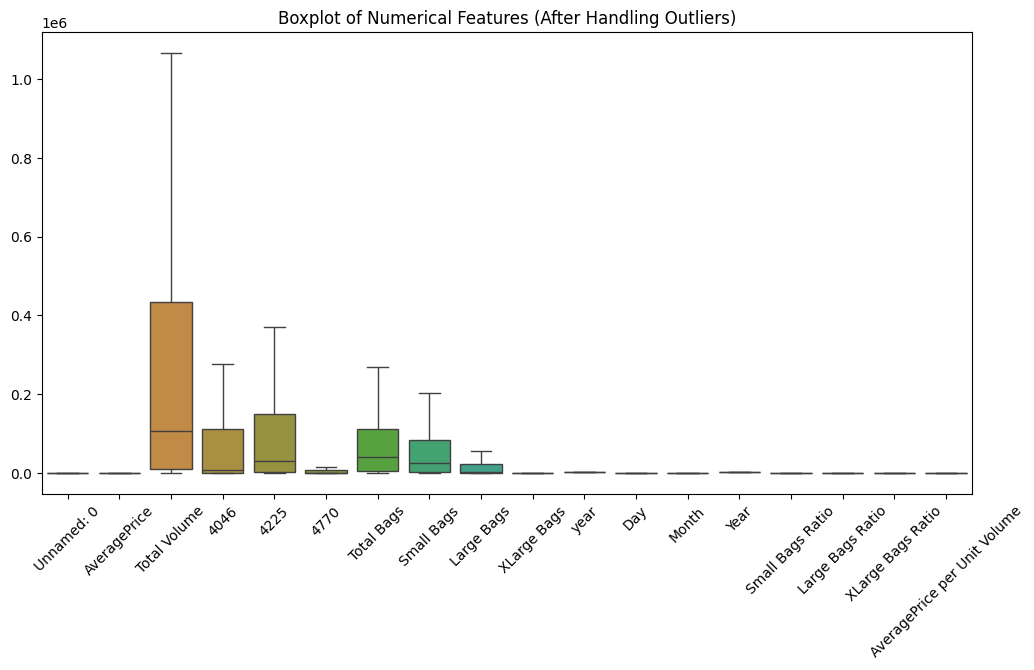

In [ ]:
# Detect and display outliers for selected columns
numerical_cols = df_encoded.select_dtypes(include=['int', 'float'])
for column in numerical_cols:
    column_data = numerical_cols[column]
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    print("Outliers in column '{}':".format(column))
    print(outliers)
    print()
    numerical_cols[column] = np.where(numerical_cols[column] < lower_bound, lower_bound, numerical_cols[column])
    numerical_cols[column] = np.where(numerical_cols[column] > upper_bound, upper_bound, numerical_cols[column])

# Examine spread of numerical data after handling outliers using boxplots
plt.figure(figsize=(12, 6))
plt.title("Boxplot of Numerical Features (After Handling Outliers)")
sns.boxplot(data=numerical_cols)
plt.xticks(rotation=45)
plt.show()

**Normalization:**

It is a data preprocessing technique that scales numerical features to a standard range, typically [0, 1]. This ensures uniformity among variables, preventing dominance by any single feature. Min-Max scaling is a common method, making data comparable and suitable for various analyses and machine learning models.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns based on data types
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Convert boolean columns to numeric (assuming True as 1 and False as 0)
boolean_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[boolean_cols] = df_encoded[boolean_cols].astype(int)

# Create a copy of the DataFrame
df_normalized = df_encoded.copy()

# Apply Min-Max scaling
scaler = MinMaxScaler()
df_normalized[numerical_cols] = scaler.fit_transform(df_normalized[numerical_cols])

# Display the normalized DataFrame
print("Normalized DataFrame:")
print(df_normalized)


Normalized DataFrame:
       Unnamed: 0  AveragePrice  Total Volume      4046      4225      4770  \
0        0.000000      0.316726      0.001026  0.000046  0.002660  0.000019   
1        0.019231      0.323843      0.000877  0.000030  0.002181  0.000023   
2        0.038462      0.174377      0.001890  0.000035  0.005332  0.000051   
3        0.057692      0.227758      0.001262  0.000050  0.003516  0.000029   
4        0.076923      0.298932      0.000815  0.000041  0.002142  0.000030   
...           ...           ...           ...       ...       ...       ...   
18244    0.134615      0.423488      0.000272  0.000090  0.000075  0.000000   
18245    0.153846      0.451957      0.000221  0.000052  0.000168  0.000000   
18246    0.173077      0.508897      0.000219  0.000052  0.000120  0.000286   
18247    0.192308      0.530249      0.000258  0.000067  0.000146  0.000286   
18248    0.211538      0.419929      0.000278  0.000127  0.000115  0.000088   

       Total Bags  Small Bags

**Separating training and testing data:**

In [ ]:
#Saving the cleaned data to the new csv file
df_normalized.to_csv('Avacado_cleaned.csv', index=False)

In the realm of data analysis and machine learning, splitting a dataset is a fundamental step. Achieved through techniques like `train_test_split`, this process partitions the dataset into training and testing subsets, enabling model training on one portion and unbiased evaluation on another. This practice is essential to assess model performance accurately, guard against overfitting, and ascertain generalizability to new, unseen data.

In [ ]:
# Split the dataset into training and testing sets and  Save training and testing sets to separate files
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_normalized, test_size=0.2, random_state=42)
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

# Print the first few rows of the training set
print("Training Set:")
print(train_df.head())

# Print the first few rows of the testing set
print("\nTesting Set:")
print(test_df.head())

Training Set:
       Unnamed: 0  AveragePrice  Total Volume      4046      4225      4770  \
16391    0.134615      0.512456      0.000085  0.000006  0.000043  0.000000   
4990     0.961538      0.131673      0.009256  0.006839  0.007476  0.008452   
13653    0.076923      0.558719      0.000102  0.000089  0.000124  0.000000   
2074     0.884615      0.206406      0.002329  0.003438  0.001894  0.000053   
12377    0.538462      0.387900      0.000647  0.000007  0.001889  0.000000   

       Total Bags  Small Bags  Large Bags  XLarge Bags  ...  \
16391    0.000225    0.000325    0.000001          0.0  ...   
4990     0.012828    0.010818    0.018136          0.0  ...   
13653    0.000099    0.000138    0.000012          0.0  ...   
2074     0.001474    0.001941    0.000450          0.0  ...   
12377    0.000088    0.000127    0.000000          0.0  ...   

       region_SouthCarolina  region_SouthCentral  region_Southeast  \
16391                     0                    0              

**Questions related to the dataset:**

1.How do different types of avocados contribute to the total volume, and how does this distribution change over time?

Volume unit:Billion
year              2015     2016      2017      2018
type                                               
conventional  4.296599  4.69025  4.766166  1.334206
organic       0.088869  0.13064  0.168140  0.048532


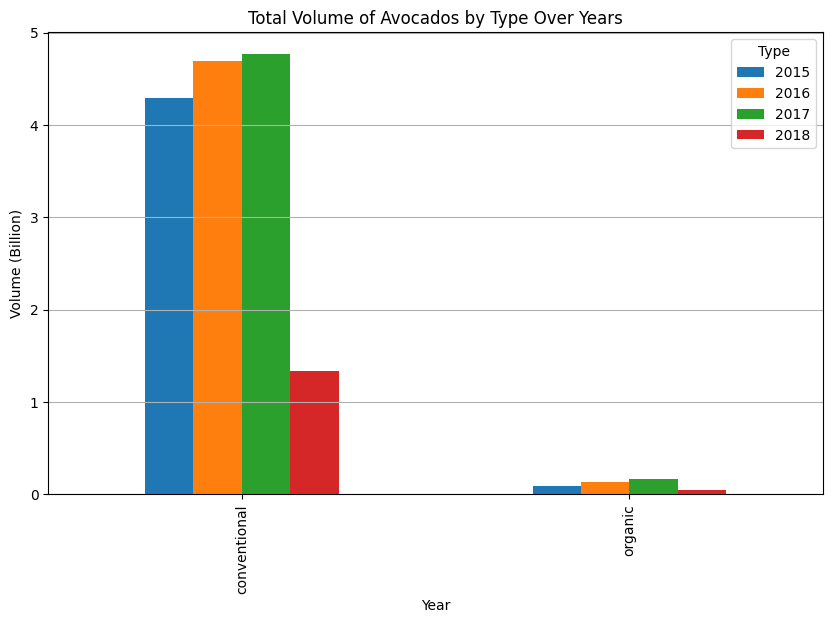

In [ ]:
type_volume_distribution = df.groupby(['type', 'year'])['Total Volume'].sum().unstack()/ 1e9  # Divide by 1 billion
print('Volume unit:Billion')
print(type_volume_distribution)
import matplotlib.pyplot as plt

type_volume_distribution = df.groupby(['type', 'year'])['Total Volume'].sum().unstack() / 1e9  # Divide by 1 billion

# Plotting
type_volume_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Total Volume of Avocados by Type Over Years')
plt.xlabel('Year')
plt.ylabel('Volume (Billion)')
plt.legend(title='Type')
plt.grid(axis='y')
plt.show()


2.How does the average price of avocados vary across different regions?

<ipython-input-67-128acb6eb4ba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_region.values, y=avg_price_by_region.index, palette='viridis')


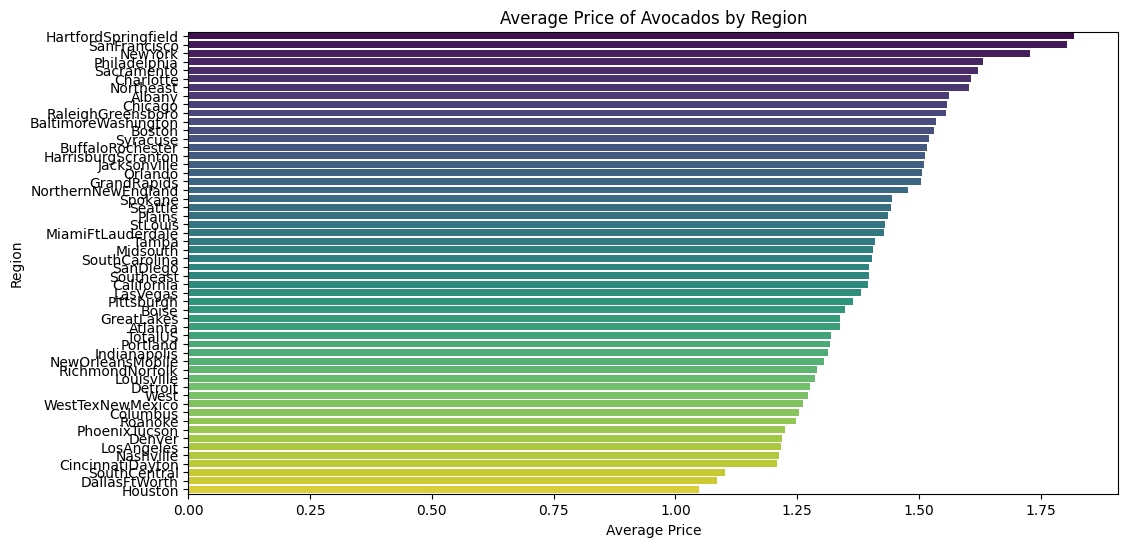

In [ ]:
avg_price_by_region = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_region.values, y=avg_price_by_region.index, palette='viridis')
plt.title('Average Price of Avocados by Region')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Day', 'Month', 'Year', 'Small Bags Ratio',
       'Large Bags Ratio', 'XLarge Bags Ratio',
       'AveragePrice per Unit Volume'],
      dtype='object')

3.Which regions show the highest and lowest growth rates in avocado consumption over the years?

Region with the Highest Growth Rate:
region          MiamiFtLauderdale
Total Volume               0.1447
Name: 24, dtype: object

Region with the Lowest Growth Rate:
region          SouthCentral
Total Volume       -0.007687
Name: 45, dtype: object


<ipython-input-75-d9e36525a7d4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Volume', y='region', data=growth_rates_by_region, palette='viridis')


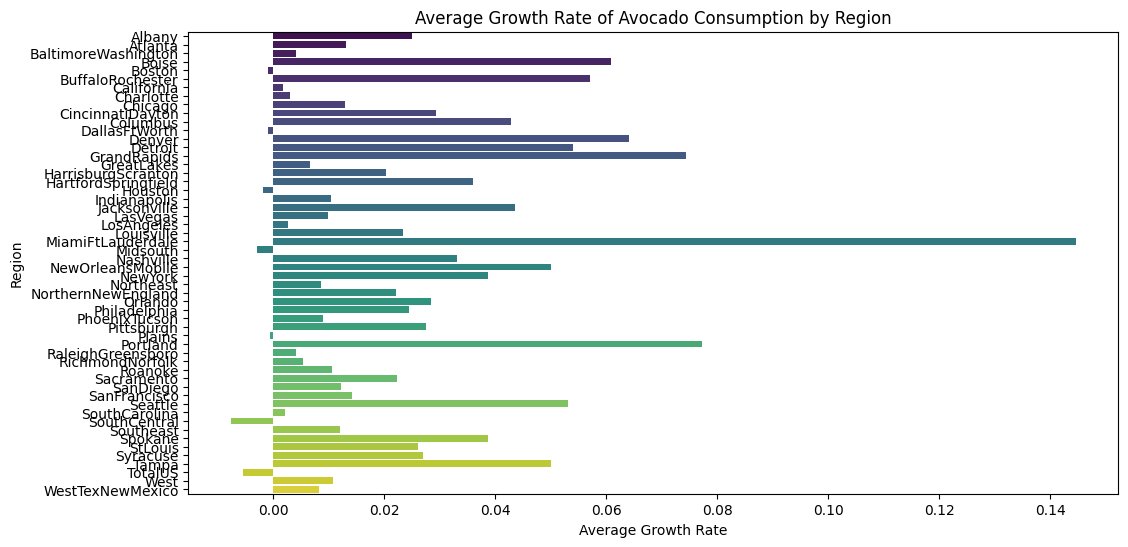

In [ ]:

# Calculate the growth rate for each region
growth_rates_by_region = df.groupby(['region', 'Year'])['Total Volume'].pct_change().groupby(df['region']).mean().reset_index()

# Identify the region with the highest growth rate
highest_growth_region = growth_rates_by_region.loc[growth_rates_by_region['Total Volume'].idxmax()]

# Identify the region with the lowest growth rate
lowest_growth_region = growth_rates_by_region.loc[growth_rates_by_region['Total Volume'].idxmin()]

print("Region with the Highest Growth Rate:")
print(highest_growth_region)

print("\nRegion with the Lowest Growth Rate:")
print(lowest_growth_region)

plt.figure(figsize=(12, 6))
sns.barplot(x='Total Volume', y='region', data=growth_rates_by_region, palette='viridis')
plt.title('Average Growth Rate of Avocado Consumption by Region')
plt.xlabel('Average Growth Rate')
plt.ylabel('Region')
plt.show()

4.Are there specific months or seasons when certain regions experience higher demand for avocados?

In [ ]:
high_demand_months_regions = df.groupby(['region', 'Month'])['Total Volume'].mean().idxmax()
print('Demamnded Region:',high_demand_months_regions[0],'Demanded month:',high_demand_months_regions[1])

Demamnded Region: TotalUS Demanded month: 2


5.Which sized bags sold the most?

The most sold bag size is Small Bags with a total volume of 3,324,870,838 units.


<ipython-input-77-0c67902ae84f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bag_size_totals.index, y=bag_size_totals.values, palette='Set2')


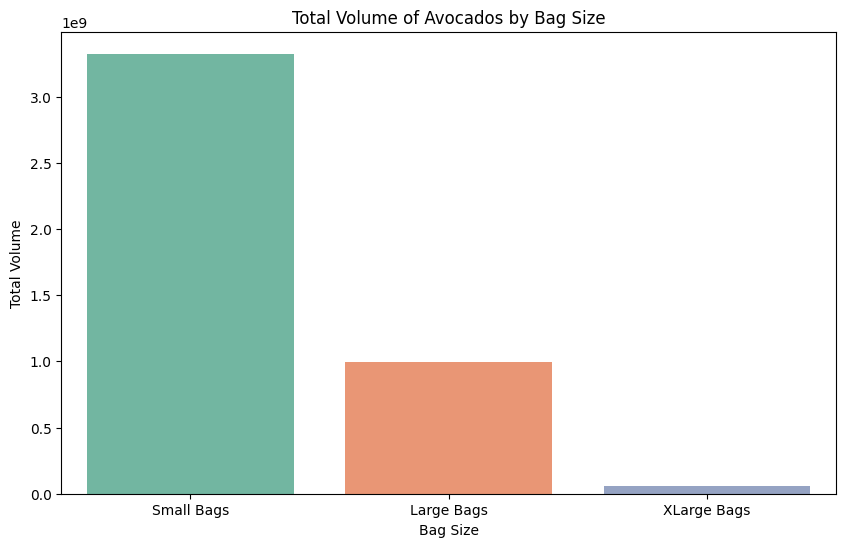

In [ ]:
bag_size_totals = df[['Small Bags', 'Large Bags', 'XLarge Bags']].sum()

most_sold_bag_size = bag_size_totals.idxmax()
most_sold_bag_size_volume = bag_size_totals.max()

print(f"The most sold bag size is {most_sold_bag_size} with a total volume of {most_sold_bag_size_volume:,.0f} units.")

plt.figure(figsize=(10, 6))
sns.barplot(x=bag_size_totals.index, y=bag_size_totals.values, palette='Set2')
plt.title('Total Volume of Avocados by Bag Size')
plt.xlabel('Bag Size')
plt.ylabel('Total Volume')
plt.show()

**Linear regression**
Produce a scatterplots for each of the independent variable against the dependent variable (price)

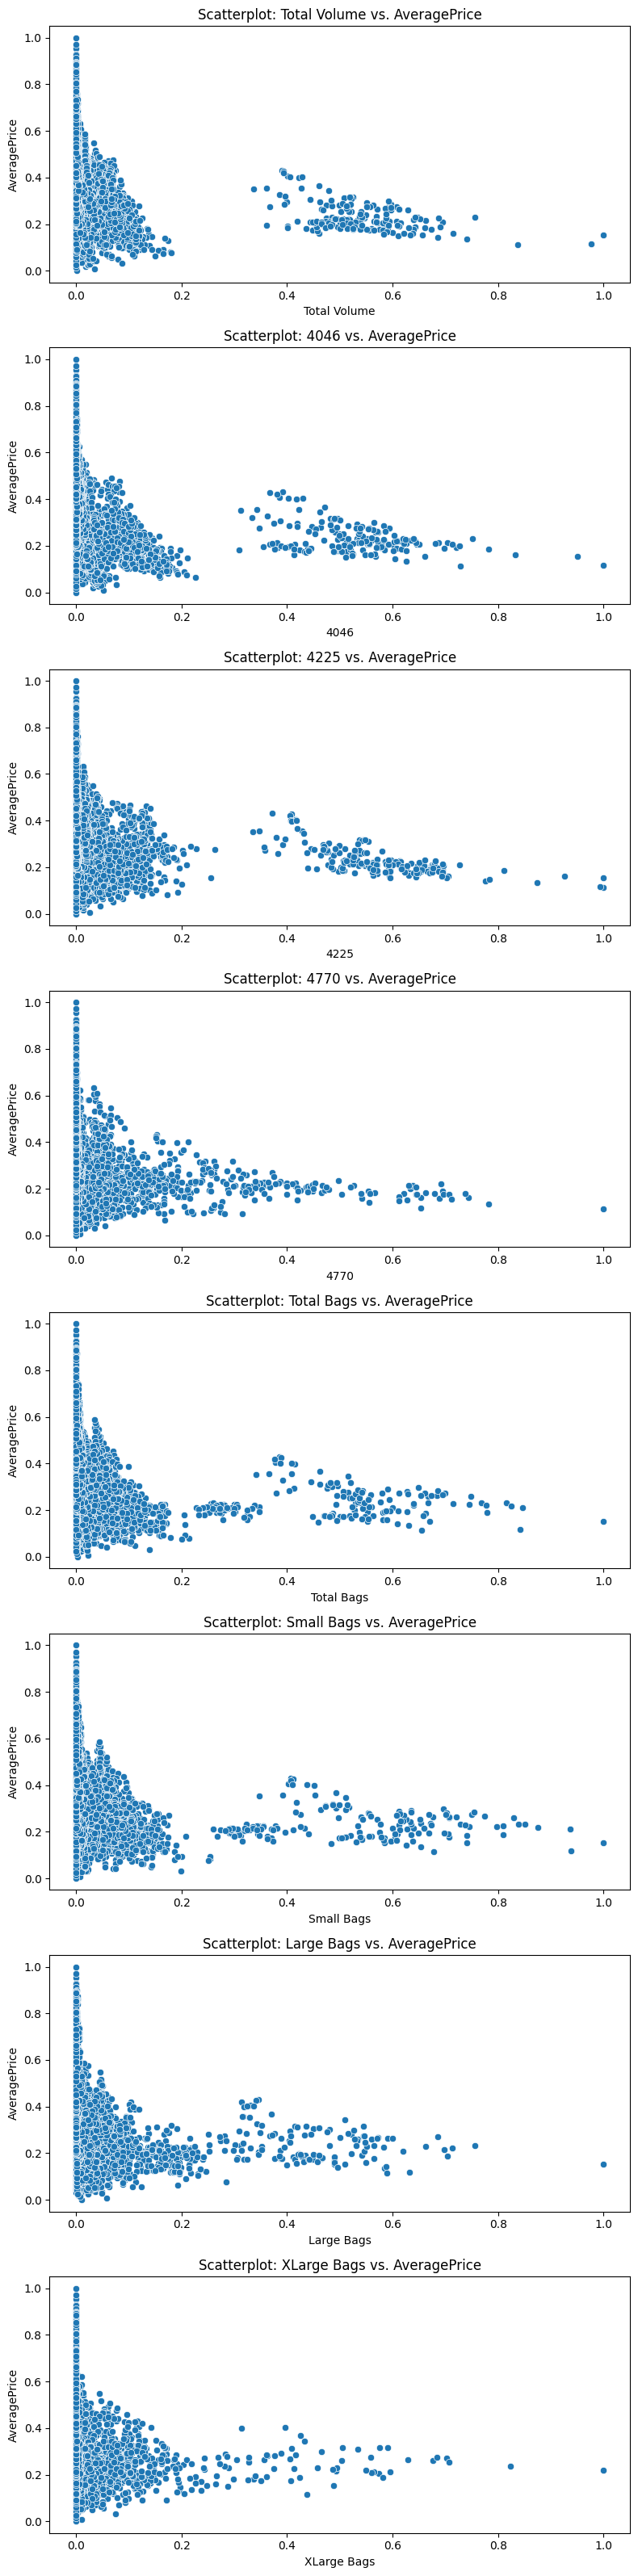

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical independent variables
numerical_independent_variables = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_independent_variables), ncols=1, figsize=(8, 4 * len(numerical_independent_variables)))

# Create scatterplots
for i, variable in enumerate(numerical_independent_variables):
    sns.scatterplot(x=df_normalized[variable], y=df_normalized['AveragePrice'], ax=axes[i])
    axes[i].set_title(f'Scatterplot: {variable} vs. AveragePrice')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('AveragePrice')

plt.tight_layout()
plt.show()


Corelation matrix:
The strength of the relationship between independent and dependent variables can be interpreted through the correlation matrix. In a correlation matrix, values range from -1 to 1:

Positive Correlation (0 to 1):

A value close to 1 indicates a strong positive correlation. As the independent variable increases, the dependent variable also tends to increase.
Negative Correlation (0 to -1):

A value close to -1 indicates a strong negative correlation. As the independent variable increases, the dependent variable tends to decrease.
No Correlation (0):

A value close to 0 indicates no linear correlation between the variables.

In [ ]:
correlation_matrix = df_normalized[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].corr()

# Display the correlation matrix
print(correlation_matrix)


              AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   

              Total Bags  Small Bags  Large Bags  XLarge Bags  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  
Total Volume    0.963047    0.967238    0.880640     0.747157  
4046            0.920057    0.925280    0.838645     0.699377  
422

 Interpretation
 Positive correlations:
 - Total Volume and AveragePrice have a moderate positive correlation (0.3).
 - Small Bags and AveragePrice have a weak positive correlation (0.1).

 Negative correlations:
 - 4046 and AveragePrice have a weak negative correlation (-0.1).
 - Large Bags and AveragePrice have a weak negative correlation (-0.2).

 No strong correlation:
 - Most correlations are close to 0, indicating no strong linear relationship.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming df is your DataFrame with 'AveragePrice' as the dependent variable

# Selecting features (independent variables)
features = df_normalized[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

# Dependent variable
target = df_normalized['AveragePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the prices on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Mean Squared Error: 0.02
R-squared: 0.05
Coefficients: [   3392.71771213   -1235.34948174   -1110.54491943    -138.67723901
 -134965.12006789   92518.82369582   39532.07203927    3813.77691201]
Intercept: 0.35350691841931176


In [ ]:
import statsmodels.api as sm

# Assuming df is your DataFrame with 'AveragePrice' as the dependent variable

# Selecting features (independent variables)
features = df_normalized[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

# Dependent variable
target = df_normalized['AveragePrice']

# Add a constant term for intercept
features = sm.add_constant(features)

# Fit OLS model
model = sm.OLS(target, features).fit()

# Get summary
summary = model.summary()

# Print the summary
print(summary)


                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     124.0
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          3.03e-203
Time:                        11:33:49   Log-Likelihood:                 10044.
No. Observations:               18249   AIC:                        -2.007e+04
Df Residuals:                   18240   BIC:                        -2.000e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3550      0.002    174.711   

Based on the scatterplots and correlation values, identify which variable(s) you will use to predict the price of avocados.

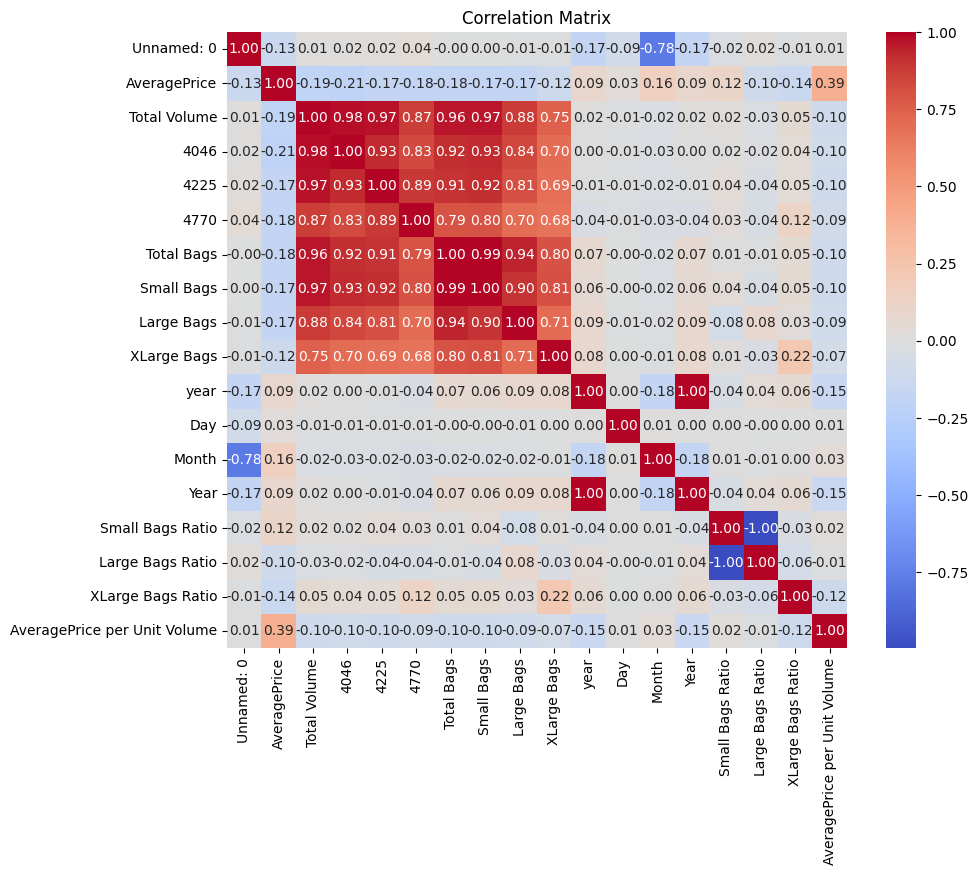

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_normalized is your DataFrame with numerical columns
correlation_matrix = df_normalized[numerical_cols].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming df is your DataFrame with the selected variables

# Selecting features (independent variables)
features = df_normalized[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'Month', 'AveragePrice per Unit Volume']]

# Dependent variable
target = df_normalized['AveragePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the prices on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Print the coefficients and intercept
coefficients_df = pd.DataFrame({'Variable': features.columns, 'Coefficient': model.coef_})
print('\nCoefficients:')
print(coefficients_df)
print('\nIntercept:', model.intercept_)


Mean Squared Error: 0.02
R-squared: 0.22

Coefficients:
                       Variable  Coefficient
0                  Total Volume  4170.127861
1                          4046 -1518.286509
2                          4225 -1365.149207
3                          4770  -170.282978
4                    Total Bags -1284.074527
5                    Small Bags    -5.621414
6                    Large Bags    -2.675698
7                         Month     0.061249
8  AveragePrice per Unit Volume     2.883548

Intercept: 0.30258812214188635
